In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
import os 

In [7]:
images = [((img/255).astype(np.float16), file[:-4].title()) for file in os.listdir("Dataset") for img in np.load(os.path.join("Dataset", file)).reshape(-1, 28, 28, 1)]

In [8]:
df = pd.DataFrame(images, columns=["Image", "Class"])

In [9]:
counts = df['Class'].value_counts()

Text(0.5, 1.0, 'Data Distribution')

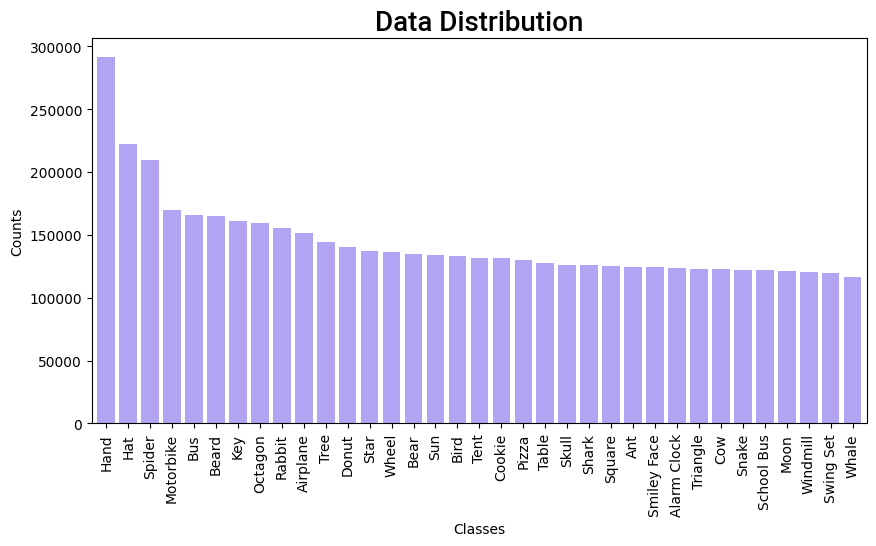

In [10]:
plt.figure(figsize=(10, 5))
counts.plot.bar(color="#B3A3F3", width=0.8)
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title("Data Distribution", fontdict={'fontsize': 20, 'fontfamily': 'Roboto', 'fontweight': 'semibold'})

In [11]:
df = df.groupby("Class").sample(n=12000, random_state=42)
df = df.reset_index(drop=True)

In [12]:
counts = df['Class'].value_counts()

Text(0.5, 1.0, 'Balanced Data Distribution')

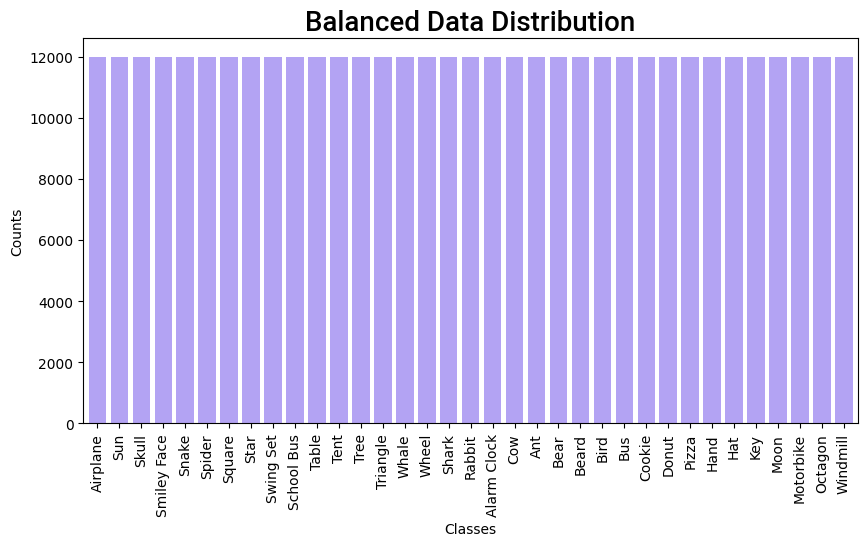

In [13]:
plt.figure(figsize=(10, 5))
counts.plot.bar(color="#B3A3F3", width=0.8)
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title("Balanced Data Distribution", fontdict={'fontsize': 20, 'fontfamily': 'Roboto', 'fontweight': 'semibold'})

In [14]:
classes = df['Class'].unique()

In [15]:
classes

array(['Airplane', 'Alarm Clock', 'Ant', 'Bear', 'Beard', 'Bird', 'Bus',
       'Cookie', 'Cow', 'Donut', 'Hand', 'Hat', 'Key', 'Moon',
       'Motorbike', 'Octagon', 'Pizza', 'Rabbit', 'School Bus', 'Shark',
       'Skull', 'Smiley Face', 'Snake', 'Spider', 'Square', 'Star', 'Sun',
       'Swing Set', 'Table', 'Tent', 'Tree', 'Triangle', 'Whale', 'Wheel',
       'Windmill'], dtype=object)

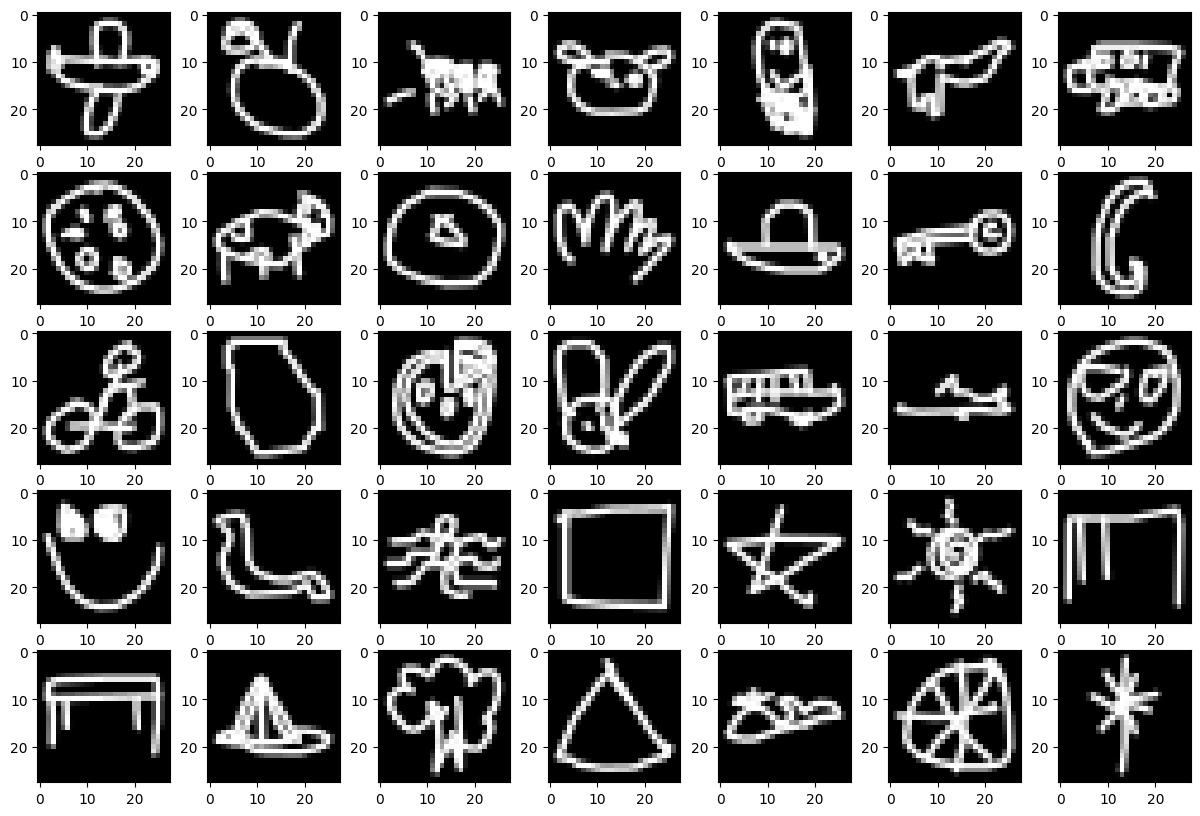

In [16]:
plt.figure(figsize=(15, 10))
for i, c in enumerate(classes):
    img = df[df['Class'] == c].iloc[0]['Image'].astype(np.float32) * 255
    plt.subplot(5, 7, i+1)
    plt.imshow(Image.fromarray(img.squeeze()))
    plt.grid(False)
    
plt.show()

In [17]:
class_map = {}
for i, c in enumerate(classes):
    class_map[c] = i

In [18]:
df['Label'] = [class_map[c] for c in df['Class']]

In [19]:
df['Encoding'] = list(np.eye(35)[df['Label']])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, test = train_test_split(df, test_size = 0.15, random_state=42, stratify=df['Class'])

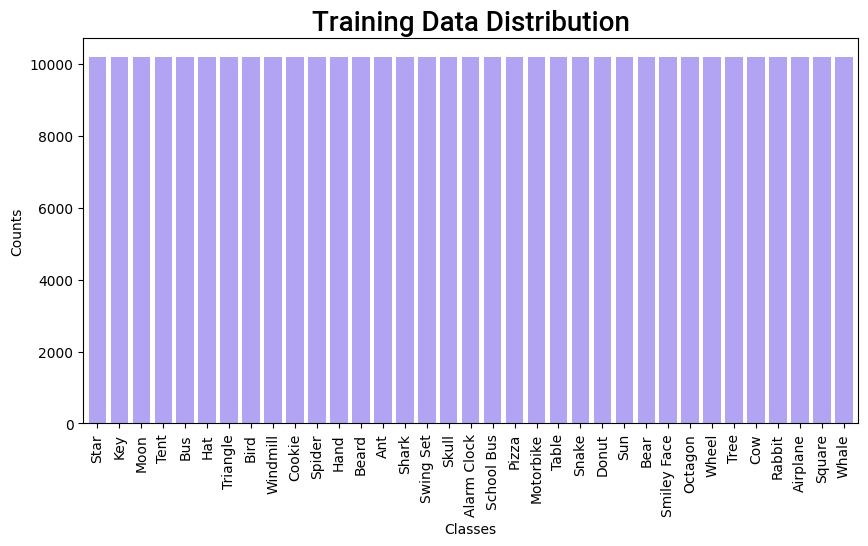

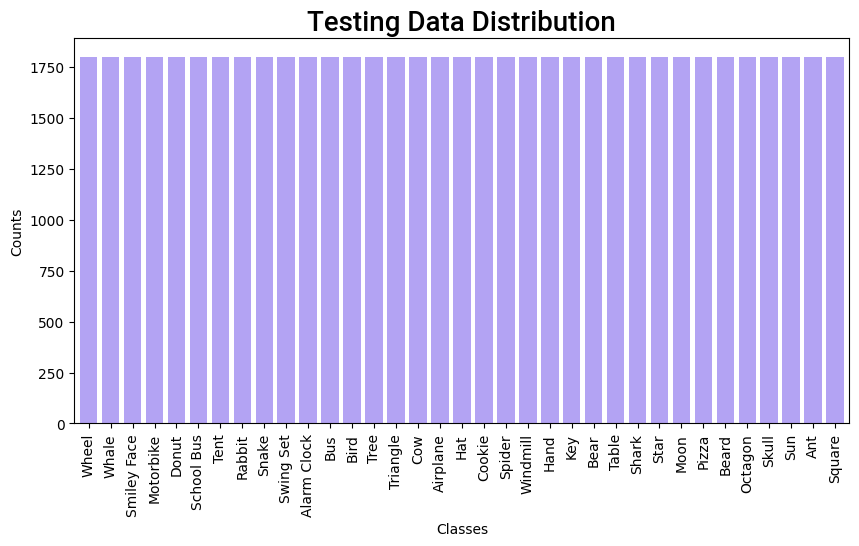

In [22]:
for data, lbl in zip([train, test], ["Training", "Testing"]):

    counts = data['Class'].value_counts()

    plt.figure(figsize=(10, 5))
    counts.plot.bar(color="#B3A3F3", width=0.8)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.title(f"{lbl} Data Distribution", fontdict={'fontsize': 20, 'fontfamily': 'Roboto', 'fontweight': 'semibold'})
    plt.show()

In [23]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=5820)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

Virtual devices cannot be modified after being initialized


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(35, activation='softmax') 
])

In [26]:
from tensorflow.keras.metrics import Precision, Recall, TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adamax

model.compile(optimizer=Adamax(0.001), loss='categorical_crossentropy', metrics=['accuracy',  TopKCategoricalAccuracy(3), Precision(), Recall()])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath = "Models/model_epoch_{epoch:02}.keras",
    save_weights_only = False,
    save_best_only = False,
    monitor = 'val_loss',
    mode = 'min',
    verbose = 0
)

In [23]:
import tensorflow.keras.backend as K
K.clear_session()

In [24]:
train.head()

,Image,Class,Label,Encoding
310942,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",Star,25,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
227541,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",School Bus,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
175769,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",Motorbike,14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
338007,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",Table,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
264504,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",Snake,22,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
X_train = np.array(train['Image'].tolist())
y_train = np.array(train['Encoding'].tolist())

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[checkpoint],
    batch_size=32
)

In [ ]:
import json
with open("Logs/training.json", 'w') as f:
    json.dump(history.history, f)

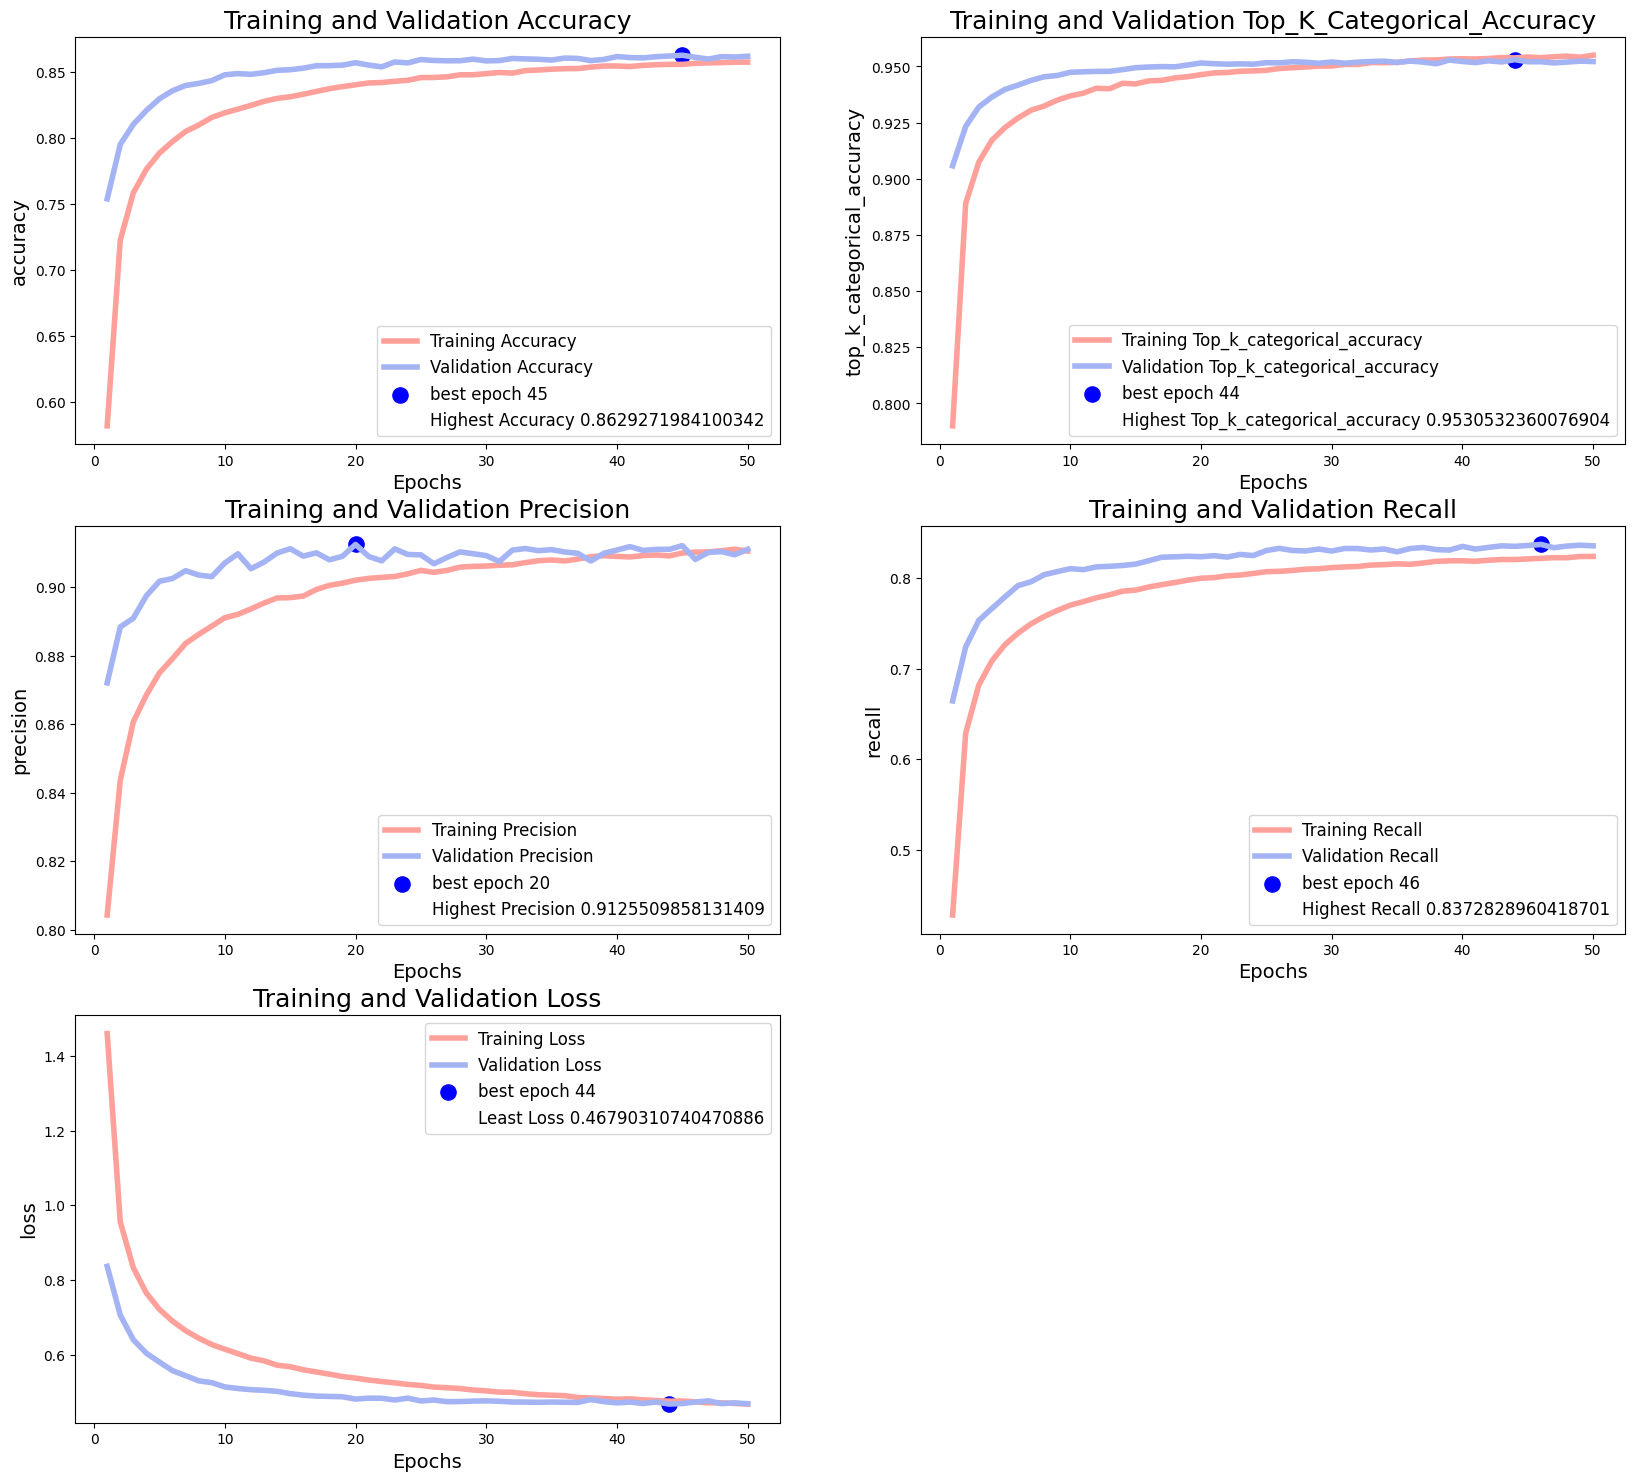

In [ ]:
hist = history.history
TRAIN_CLR = '#FFA09B'
VAL_CLR  = '#A3B3F3'
BEST_CLR = 'b'

plt.style.reload_library()
epochs = [i for i in range(1, len(hist['loss'])+1)]
plt.figure(figsize=(20, 18))

for i, m in enumerate(['accuracy', 'top_k_categorical_accuracy', 'precision', 'recall', 'loss']):
    train_values = hist[m]
    val_values = hist[f'val_{m}']
    if m == 'loss':
        best_value = np.min(val_values)
    else:
        best_value = np.max(val_values)
    best_epochs = [j for j, v in enumerate(val_values) if v == best_value]

    plt.subplot(3, 2, i+1)
    plt.plot(epochs, train_values, color=TRAIN_CLR, label = f"Training {m.capitalize()}", linewidth=4)
    plt.plot(epochs, val_values, color=VAL_CLR, label = f"Validation {m.capitalize()}", linewidth=4)
    for e in best_epochs:
        plt.scatter(e+1, best_value, color=BEST_CLR, s=120, label=f'best epoch {e+1}')
    plt.scatter(best_epochs[0]+1, best_value, color=BEST_CLR, s=0, label=f"{'Least' if m == 'loss' else 'Highest'} {m.capitalize()} {best_value}")
    plt.title(f"Training and Validation {m.title()}", fontdict={'size':18})
    plt.xlabel('Epochs', fontdict={'size':14})
    plt.ylabel(m, fontdict={'size':14})
    plt.legend(fontsize=12)

# Testing

In [46]:
test_results = {'loss': [], 'accuracy': [], 'top_k_categorical_accuracy': [], 'precision': [], 'recall':[]}

In [ ]:
from tensorflow.keras.models import load_model

X_test = np.array(test['Image'].tolist())
y_test = np.array(test['Encoding'].tolist())

for path in os.listdir('Models'):
    if path.endswith('.keras'):
        mod = load_model(os.path.join("Models", path))
        score = mod.evaluate(X_test, y_test)
        for i, key in enumerate(test_results.keys()):
            test_results[key].append(score[i])

1969/1969 [==============================] - 9s 5ms/step - loss: 0.4679 - accuracy: 0.8631 - top_k_categorical_accuracy: 0.9530 - precision: 0.9118 - recall: 0.8364


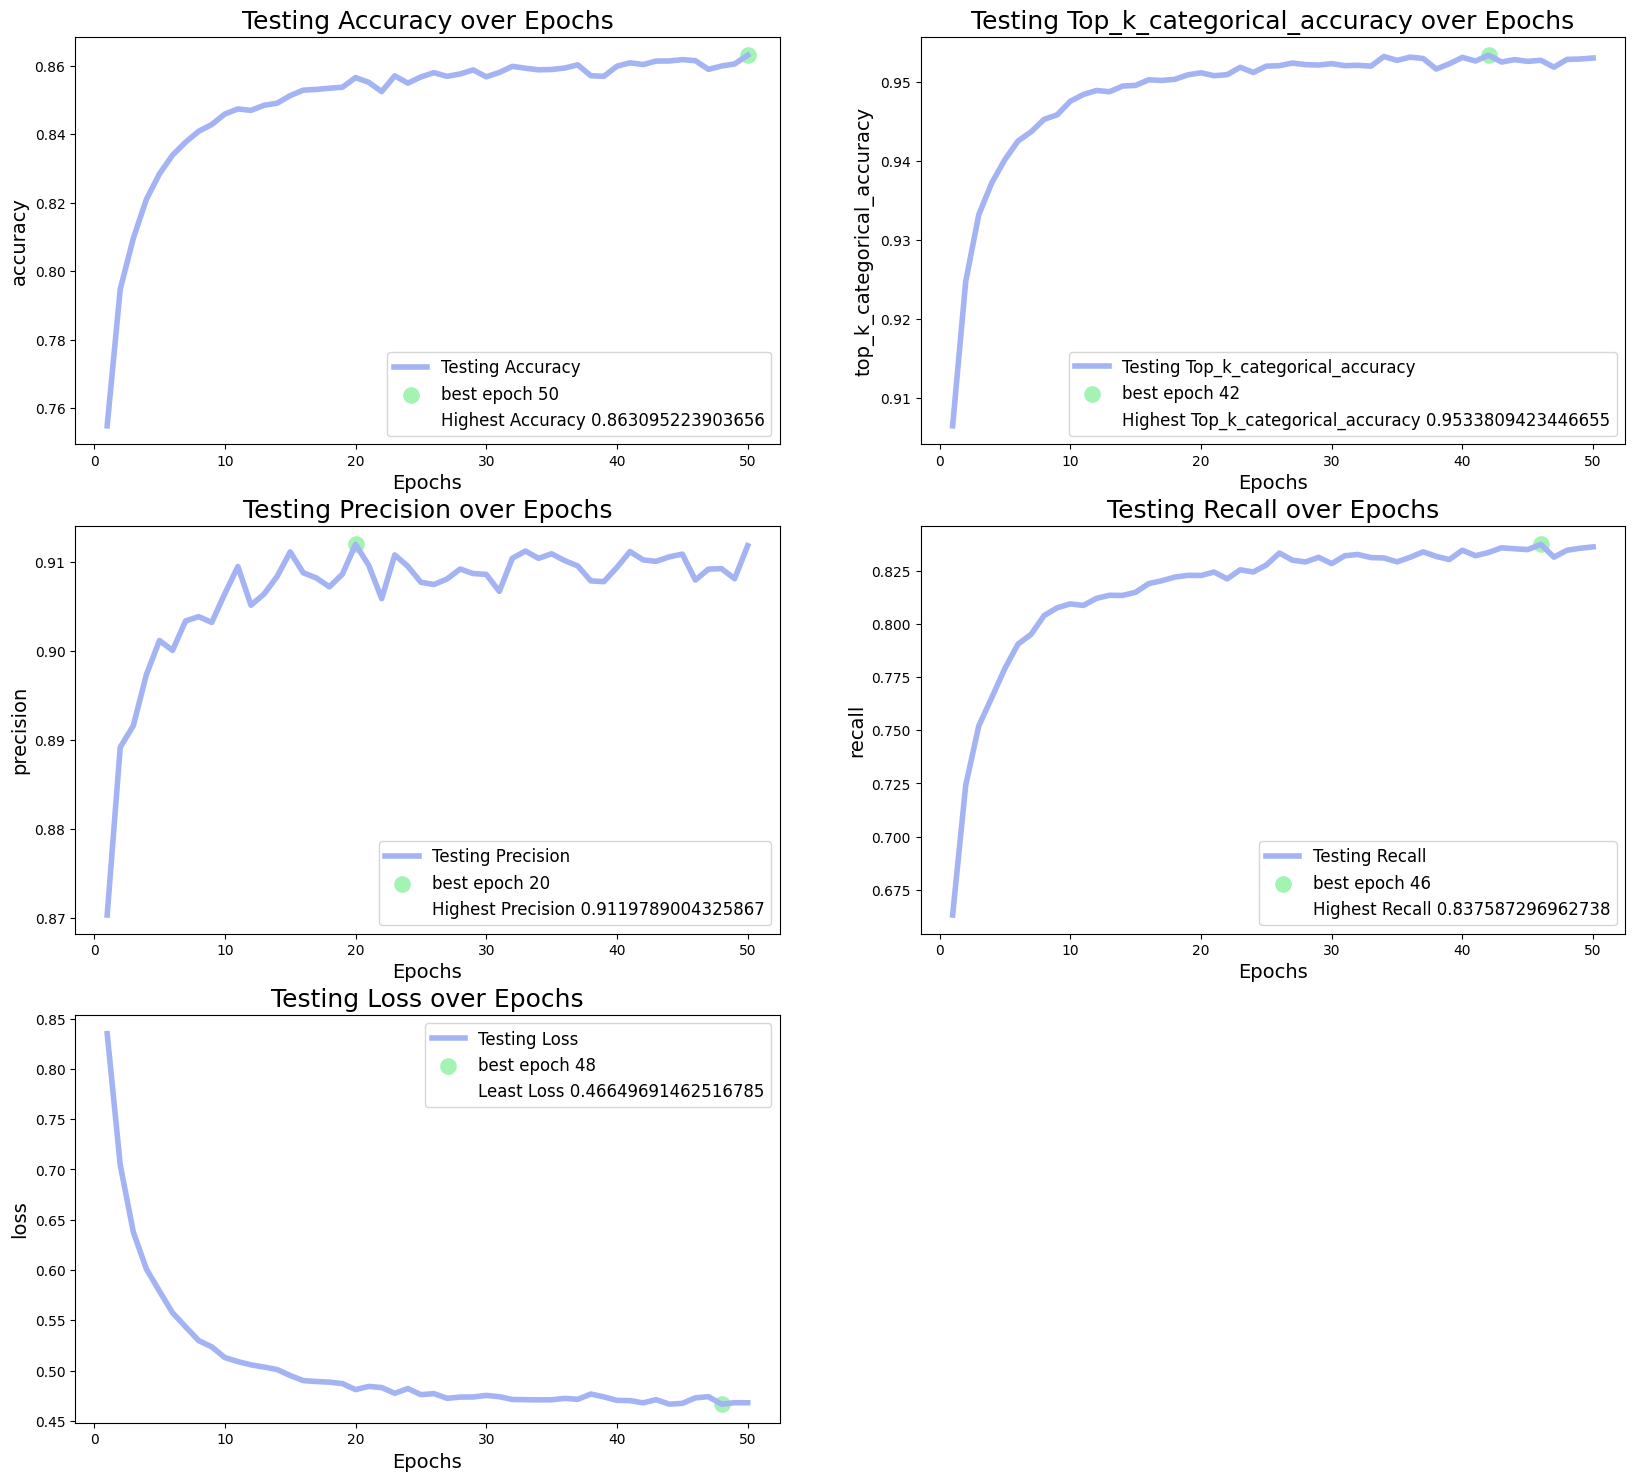

In [52]:
TEST_CLR  = '#A3B3F3'
BEST_CLR = '#A3F3B3'

epochs = [i for i in range(1, len(test_results['loss'])+1)]
plt.figure(figsize=(20, 18))
for i, m in enumerate(['accuracy', 'top_k_categorical_accuracy', 'precision', 'recall', 'loss']):
    values = test_results[m]
    if m == 'loss':
        best_value = np.min(values)
    else:
        best_value = np.max(values)
    best_epochs = [j for j, v in enumerate(values) if v == best_value]

    plt.subplot(3, 2, i+1)
    plt.plot(epochs, values, color=TEST_CLR, label = f"Testing {m.capitalize()}", linewidth=4)
    for e in best_epochs:
        plt.scatter(e+1, best_value, color=BEST_CLR, s=120, label=f'best epoch {e+1}')
    plt.scatter(best_epochs[0]+1, best_value, color=BEST_CLR, s=0, label=f"{'Least' if m == 'loss' else 'Highest'} {m.capitalize()} {best_value}")
    plt.title(f"Testing {m.capitalize()} over Epochs", fontdict={'size':18})
    plt.xlabel('Epochs', fontdict={'size':14})
    plt.ylabel(m, fontdict={'size':14})
    plt.legend(fontsize=12)

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from tensorflow.keras.models import load_model
model = load_model(r"Models\model_epoch_02.keras")

In [24]:
X_test = np.array(test['Image'].tolist())
y_test = np.array(test['Encoding'].tolist())

In [25]:
y_pred = model.predict(X_test)

1969/1969 [==============================] - 12s 2ms/step


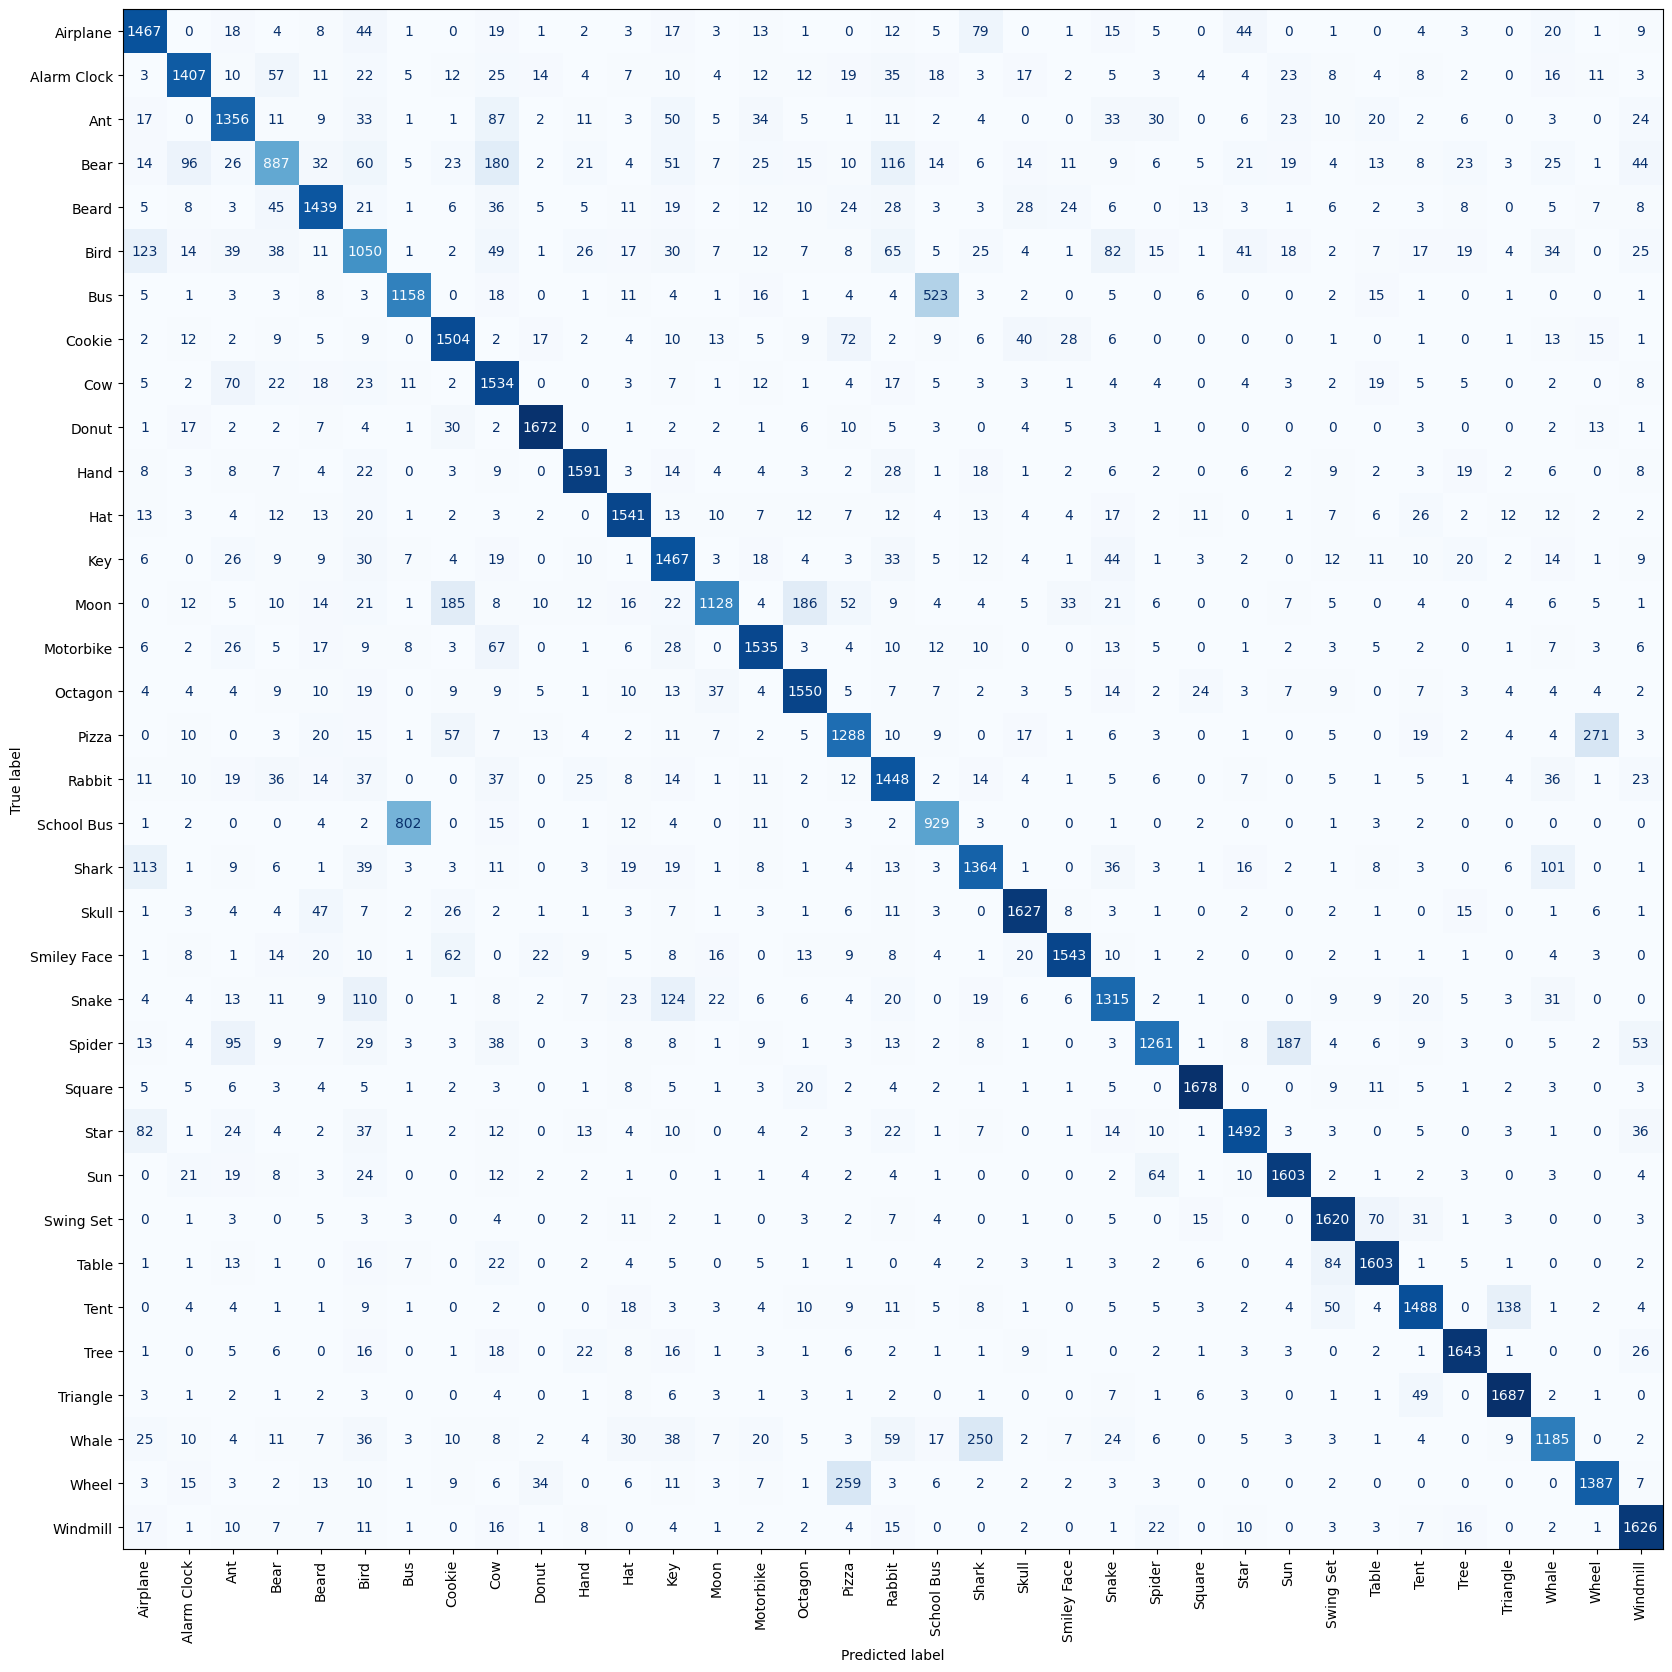

In [41]:
conf = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=classes)
fig = plt.figure(figsize=(20, 20))
disp.plot(colorbar=False, cmap=plt.cm.Blues, ax=fig.subplots(1, 1), xticks_rotation='vertical')